In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import copy
from sklearn.metrics import accuracy_score # Please note that this is the only sklearn function that can be utilized.

###### Input data

In [2]:
# training data
str_train_data = np.genfromtxt("./HW3_dataset/PR_HW3_Train.csv", delimiter = ",", dtype= float)
train_data = np.asarray(str_train_data[1:, :7], dtype = "float64")
train_label = np.asarray(str_train_data[1:, 7], dtype = int)

# validation data
str_val_data = np.genfromtxt("./HW3_dataset/PR_HW3_Val.csv", delimiter = ",", dtype=float)
val_data = np.asarray(str_val_data[1:, :7], dtype = "float64")
val_label = np.asarray(str_val_data[1:, 7], dtype = int)

# testing data
str_test_data = np.genfromtxt("./HW3_dataset/PR_HW3_Test.csv", delimiter = ",", dtype=float)
test_data = np.asarray(str_test_data[1:, :7], dtype = "float64")

print("# of features: ", train_data.shape[1])
print("# of classes: ", len(set(train_label)))
print("# of training data: ", train_data.shape[0])
print("# of validation data: ", val_data.shape[0])
print("# of testing data: ", test_data.shape[0])

# of features:  7
# of classes:  7
# of training data:  800
# of validation data:  800
# of testing data:  800


### Model Implementation

In [3]:
def gini(sequence):
    l = len(sequence)
    s = set(sequence)
    d = {}
    for k in s:
        d[k] = 0
    for k in sequence:
        d[k] += 1
    for k in s:
        d[k] /= l
    __gini__ = 1.0
    for k in s:
        __gini__ -= (d[k]*d[k])
    return __gini__


def entropy(sequence):
    l = len(sequence)
    s = set(sequence)
    d = {}
    for k in s:
        d[k] = 0.0
    for k in sequence:
        d[k] += 1
    for k in s:
        d[k] /= l
    __entropy__ = 0.0
    for k in s:
        __entropy__ -= d[k]*np.log2(d[k])
    return __entropy__

In [4]:
def Split(X, y, feature, val):
    yes_X = []
    yes_y = []
    no_X = []
    no_y = []
    for i in range(X.shape[0]):
        if X[i, feature] > val:
            yes_X.append(X[i])
            yes_y.append(y[i])
        else:
            no_X.append(X[i])
            no_y.append(y[i])
    yes_X = np.asarray(yes_X)
    yes_y = np.asarray(yes_y)
    no_X = np.asarray(no_X)
    no_y = np.asarray(no_y)
    return yes_X, yes_y, no_X, no_y

In [5]:
class Tree():
    """
        You can add/change any variables/methods to meet your need.
    """
    def __init__(self):  
        self.left = None # no
        self.right = None # yes
        self.feature = 0
        self.threshold = 0
        self.label = -1
        self.vals = np.zeros(7)
        self.purity = -1
        pass
    def isLeaf(self):
        if self.left == None and self.right == None:
            return True
        else:
            return False


In [6]:
class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None, max_features=None):
        
        """
            You can add/change any variables/methods to meet your need.
        """
        self.nclasses = 7
        self.root = None
        self.__criterion__ = criterion
        if criterion == 'gini':
            self.criterion = gini
            self.threshold_purity = 0.2
        elif criterion == 'entropy':
            self.criterion = entropy
            self.threshold_purity = 0.9
        if max_depth is None:
            self.max_depth = 50
        else:
            self.max_depth = max_depth
        
        if max_features is None:
            self.nfeatures = 7
        else:
            self.nfeatures = max_features

    def fit(self, X, y):
        classes = set(y)
        if X.shape[0] == 0:
            n = Tree()
            n.label = np.random.randint(7)
            self.root = n
            return 
        if(self.max_depth == 0):
            l = Tree()
            s = set(y)
            d = {}
            for k in s:
                d[k] = 0
            for k in y:
                d[k] += 1
                l.vals[k] += 1
            max_label = 0
            max_num_label = -99
            for k in s:
                if d[k] > max_num_label:
                    max_num_label = d[k]
                    max_label = k
            l.label = max_label
            l.feature = -np.Inf
            l.threshold = -np.Inf
            l.purity = self.criterion(y)
            self.root = l
            return
        else:
            purity = self.criterion(y)
            if self.__criterion__ == "gini":
                if(purity <= self.threshold_purity):
                    l = Tree()
                    s = set(y)
                    d = {}
                    for k in s:
                        d[k] = 0
                    for k in y:
                        d[k] += 1
                        l.vals[k] += 1
                    max_label = 0
                    max_num_label = -99
                    for k in s:
                        if d[k] > max_num_label:
                            max_num_label = d[k]
                            max_label = k
                    l.label = max_label
                    l.feature = -np.Inf
                    l.threshold = -np.Inf
                    l.purity = self.criterion(y)
                    self.root = l
                else:
                    root = Tree()
                    Select_feature = 0
                    Select_threshold = 0
                    mini_purity = np.Inf
                    for f in range(self.nfeatures):
                        if X.shape[0] > 1:
                            min_feature_value =(0.7+np.random.random())*(np.sum(X[:, f])/X.shape[0] - min(X[:, f])) + min(X[:, f])
                        else:
                            min_feature_value = X[f]
                        yes_X, yes_y, no_X, no_y = Split(X, y, f, min_feature_value)
                        yes_purity = self.criterion(yes_y)
                        no_purity = self.criterion(no_y)
                        p = (yes_X.shape[0]/X.shape[0])*yes_purity + (no_X.shape[0]/X.shape[0])*no_purity
                        if p <= mini_purity and min(yes_X.shape[0], no_X.shape[0]) > 0:
                            mini_purity = p
                            Select_feature = f
                            Select_threshold = min_feature_value
                    root.feature = Select_feature
                    root.threshold = Select_threshold
                    yes_X, yes_y, no_X, no_y = Split(X, y, Select_feature, Select_threshold)
                    left_DT = DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    left_DT.fit(no_X, no_y)
                    right_DT = DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    right_DT.fit(yes_X, yes_y)
                    root.left = left_DT.root
                    root.right = right_DT.root
                    for k in y:
                        root.vals[k] += 1
                    root.purity = self.criterion(y)
                    self.root = root
            elif self.__criterion__ == "entropy":
                if(purity <=self.threshold_purity):
                    l = Tree()
                    s = set(y)
                    d = {}
                    for k in s:
                        d[k] = 0
                    for k in y:
                        d[k] += 1
                        l.vals[k] += 1
                    max_label = 0
                    max_num_label = -99
                    for k in s:
                        if d[k] > max_num_label:
                            max_num_label = d[k]
                            max_label = k
                    l.label = max_label
                    l.feature = -np.Inf
                    l.threshold = -np.Inf
                    l.purity = self.criterion(y)
                    self.root = l
                else:
                    root = Tree()
                    Select_feature = 0
                    Select_threshold = 0
                    mini_purity = np.Inf
                    for f in range(self.nfeatures):
                        threshold = np.mean(X[:, f]) - np.random.uniform(-0.3, 1)*np.std(X[:, f])
                        yes_X, yes_y, no_X, no_y = Split(X, y, f, threshold)
                        yes_purity = self.criterion(yes_y)
                        no_purity = self.criterion(no_y)
                        p = (yes_X.shape[0]/X.shape[0])*yes_purity + (no_X.shape[0]/X.shape[0])*no_purity
                        if p <= mini_purity and min(yes_X.shape[0], no_X.shape[0]) > 0:
                            mini_purity = p
                            Select_feature = f
                            Select_threshold = threshold
                    root.feature = Select_feature
                    root.threshold = Select_threshold
                    yes_X, yes_y, no_X, no_y = Split(X, y, Select_feature, Select_threshold)
                    left_DT = DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    left_DT.fit(no_X, no_y)
                    right_DT = DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    right_DT.fit(yes_X, yes_y)
                    root.left = left_DT.root
                    root.right = right_DT.root
                    root.purity = self.criterion(y)
                    for k in y:
                        root.vals[k] += 1
                    self.root = root
        
        return

    def traversalTree(self, X, root):
        if root.isLeaf():
            return root.label
        else:
            if X[root.feature] > root.threshold:
                return self.traversalTree(X, root.right)
            else:
                return self.traversalTree(X, root.left)

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            pred = self.traversalTree(X[i], self.root)
            y_pred.append(pred)
        return np.asarray(y_pred)


In [7]:
def LDR(root):
    if root != None:
        LDR(root.left)
        print("--------------------------------------")
        if root.isLeaf():
            print("Purity: ", root.purity)
            print("Label: ", root.label)
            print("vals: ", root.vals)
        else:
            print("Purity: ", root.purity)
            print("X[", root.feature, "] <= ", root.threshold)
            print("vals: ", root.vals)
        print("--------------------------------------")
        LDR(root.right)
def DLR(root):
    if root != None:
        print("--------------------------------------")
        if root.isLeaf():
            print("Purity: ", root.purity)
            print("Label: ", root.label)
            print("vals: ", root.vals)
        else:
            print("Purity: ", root.purity)
            print("X[", root.feature, "] <= ", root.threshold)
            print("vals: ", root.vals)
        print("--------------------------------------")
        DLR(root.left)
        DLR(root.right)

### Questions for Decision Tree

In [8]:
# For Q1
ex1 = np.array(["+", "+", "+", "+", "+", "-"])
ex2 = np.array(["+", "+", "+", "-", "-", "-"])
ex3 = np.array(["+" ,"-", "-", "-", "-", "-"])

print(f"{ex1}: entropy = {entropy(ex1)}\n{ex2}: entropy = {entropy(ex2)}\n{ex3}: entropy = {entropy(ex3)}\n")
print(f"{ex1}: gini index = {gini(ex1)}\n{ex2}: gini index = {gini(ex2)}\n{ex3}: gini index = {gini(ex3)}\n")

['+' '+' '+' '+' '+' '-']: entropy = 0.6500224216483541
['+' '+' '+' '-' '-' '-']: entropy = 1.0
['+' '-' '-' '-' '-' '-']: entropy = 0.6500224216483541

['+' '+' '+' '+' '+' '-']: gini index = 0.2777777777777777
['+' '+' '+' '-' '-' '-']: gini index = 0.5
['+' '-' '-' '-' '-' '-']: gini index = 0.2777777777777777



In [9]:
# For Q2-1, validation accuracy should be higher than or equal to 0.73

np.random.seed(869) # You may adjust the seed number in all the cells


dt_depth3 = DecisionTree(criterion='gini', max_features=None, max_depth=3)
dt_depth3.fit(train_data, train_label)
acc = accuracy_score(val_label, dt_depth3.predict(val_data))

print("Q2-1 max_depth=3: ", acc)

Q2-1 max_depth=3:  0.76


In [10]:
# For Q2-2, validation accuracy should be higher than or equal to 0.85

np.random.seed(68)


dt_depth10 = DecisionTree(criterion='gini', max_features=None, max_depth=10)
dt_depth10.fit(train_data, train_label)
acc = accuracy_score(val_label,  dt_depth10.predict(val_data))

print("Q2-2 max_depth=10: ", acc)

Q2-2 max_depth=10:  0.85125


In [11]:
# For Q3-1, validation accuracy should be higher than or equal to 0.73

np.random.seed(869)

dt_gini = DecisionTree(criterion='gini', max_features=None, max_depth=3)
dt_gini.fit(train_data, train_label)

print("Q3-1 criterion='gini': ", accuracy_score(val_label, dt_gini.predict(val_data)))


Q3-1 criterion='gini':  0.76


In [12]:
# For Q3-2, validation accuracy should be higher than or equal to 0.77
np.random.seed(147)

dt_entropy = DecisionTree(criterion='entropy', max_features=None, max_depth=3)
dt_entropy.threshold_purity = 0.5
dt_entropy.fit(train_data, train_label)
acc = accuracy_score(val_label, dt_entropy.predict(val_data))
print("Q3-2 criterion='entropy': ", acc)



Q3-2 criterion='entropy':  0.7725


In [13]:
# from sklearn.tree import DecisionTreeClassifier as SK_DecisionTreeClassifier
# from sklearn import tree

# sk_dt = SK_DecisionTreeClassifier(criterion='entropy', max_depth=3)
# sk_dt.fit(train_data, train_label)
# sk_acc = accuracy_score(val_label, sk_dt.predict(val_data))
# print("entropy sklearn acc: ", sk_acc)


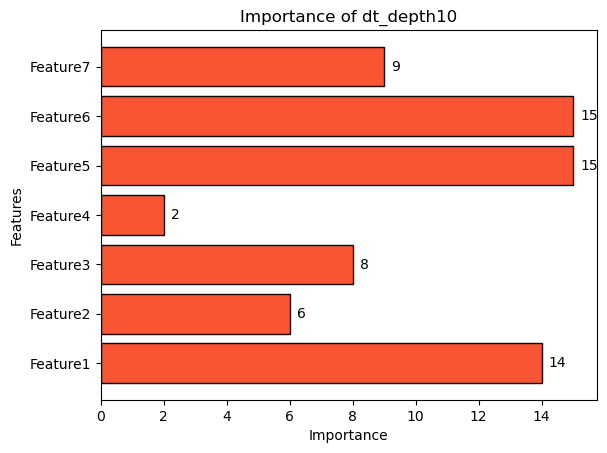

In [14]:
# For Q4

# Use simply counting to get the feature importance: dt_depth10.importance

def countImportance(root, imp):
    if root.isLeaf():
        return
    else:
        imp[root.feature] += 1
        countImportance(root.left, imp)
        countImportance(root.right, imp)
    return

labelList=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']
imp = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
x = np.array([1, 2, 3, 4, 5, 6, 7])
countImportance(dt_depth10.root, imp)
counts = []
for k in imp:
    counts.append(imp[k])
counts = np.array(counts)
b = plt.barh(x, counts, tick_label = labelList, facecolor = "#F75533", edgecolor="#0A0A0A")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.bar_label(b, padding=5)
plt.title("Importance of dt_depth10")
plt.show()

### Questions for Random Rorest

In [27]:
# for Random forest
class rf_DecisionTree():
    def __init__(self, criterion='gini', max_depth=None, max_features=None, availabel_feature = None):
        
        """
            You can add/change any variables/methods to meet your need.
        """
        self.nclasses = 7
        self.root = None
        self.__criterion__ = criterion
        if criterion == 'gini':
            self.criterion = gini
            self.threshold_purity = 0.1
        elif criterion == 'entropy':
            self.criterion = entropy
            self.threshold_purity = 0.5
        if max_depth is None:
            self.max_depth = 50
        else:
            self.max_depth = max_depth
        
        if max_features is None:
            self.nfeatures = 7
        else:
            self.nfeatures = max_features
        if availabel_feature is None:
            self.availabel_feature = np.arange(7)
        else:
            self.availabel_feature = availabel_feature

    def fit(self, X, y):
        classes = set(y)
        if X.shape[0] == 0:
            self.root = None
            return 
        if(self.max_depth == 0):
            l = Tree()
            s = set(y)
            d = {}
            for k in s:
                d[k] = 0
            for k in y:
                d[k] += 1
                l.vals[k] += 1
            max_label = 0
            max_num_label = -99
            for k in s:
                if d[k] > max_num_label:
                    max_num_label = d[k]
                    max_label = k
            l.label = max_label
            l.feature = -np.Inf
            l.threshold = -np.Inf
            l.purity = self.criterion(y)
            self.root = l
            return
        else:
            purity = self.criterion(y)
            if(purity <= self.threshold_purity):
                l = Tree()
                s = set(y)
                d = {}
                for k in s:
                    d[k] = 0
                for k in y:
                    d[k] += 1
                    l.vals[k] += 1
                max_label = 0
                max_num_label = -99
                for k in s:
                    if d[k] > max_num_label:
                        max_num_label = d[k]
                        max_label = k
                l.label = max_label
                l.feature = -np.Inf
                l.threshold = -np.Inf
                l.purity = self.criterion(y)
                self.root = l
            else:
                root = Tree()
                Select_feature = 0
                Select_threshold = 0
                mini_purity = np.Inf
                for f in self.availabel_feature:
                    sorted_f = np.sort(X[:, f])
                    for i in range(sorted_f.shape[0]-1):
                        # threshold = (0.4+np.random.random())*(np.mean(X[:, f])-np.min(X[:, f])) + np.min(X[:, f])
                        threshold = (sorted_f[i] + sorted_f[i+1])/2
                        yes_X, yes_y, no_X, no_y = Split(X, y, f, threshold)
                        yes_purity = self.criterion(yes_y)
                        no_purity = self.criterion(no_y)
                        p = (yes_X.shape[0]/X.shape[0])*yes_purity + (no_X.shape[0]/X.shape[0])*no_purity
                        if p <= mini_purity and min(yes_X.shape[0], no_X.shape[0]) > 0:
                            mini_purity = p
                            Select_feature = f
                            Select_threshold = threshold
                root.feature = Select_feature
                root.threshold = Select_threshold
                yes_X, yes_y, no_X, no_y = Split(X, y, Select_feature, Select_threshold)
                left_DT = rf_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures, availabel_feature=self.availabel_feature)
                left_DT.fit(no_X, no_y)
                right_DT = rf_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures, availabel_feature=self.availabel_feature)
                right_DT.fit(yes_X, yes_y)
                root.left = left_DT.root
                root.right = right_DT.root
                for k in y:
                    root.vals[k] += 1
                root.purity = self.criterion(y)
                self.root = root
        return

    def traversalTree(self, X, root):
        if root is None:
            return np.random.randint(7)
        if root.isLeaf():
            return root.label
        else:
            if X[root.feature] > root.threshold:
                return self.traversalTree(X, root.right)
            else:
                return self.traversalTree(X, root.left)

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            pred = self.traversalTree(X[i], self.root)
            y_pred.append(pred)
        return np.asarray(y_pred)


In [28]:
class RandomForest():
    """
        You can add/change any variables/methods to meet your need.
    """
    def __init__(self, n_estimators=10, max_features=None, boostrap=True, criterion='gini', max_depth=None):
        
        self.n_estimators = n_estimators
        if max_features is None:
            self.max_features = 7
        else:
            self.max_features = int(max_features)
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        if criterion == "gini":
            self.threshold_purity = 0.2
        else:
            self.threshold_purity = 0.9
        self.forest = []
        
    def fit(self, X, y):
        for n in range(self.n_estimators):
            D = np.random.randint(0, 800, 1000)
            new_X = []
            new_y = []
            for d in D:
                new_X.append(X[d])
                new_y.append(y[d])
            new_y = np.array(new_y)
            new_X = np.array(new_X)
            available_feature = np.random.choice(7, self.max_features, replace=False)
            DT = rf_DecisionTree(criterion=self.criterion, max_features=self.max_features, max_depth=self.max_depth, availabel_feature=available_feature)
            DT.threshold_purity = self.threshold_purity
            DT.fit(new_X, new_y)
            self.forest.append(DT.root)
        pass
    def traversalTree(self, X, root):
        if root is None:
            return np.random.randint(7)
        if root.isLeaf():
            return root.label
        else:
            if X[root.feature] > root.threshold:
                return self.traversalTree(X, root.right)
            else:
                return self.traversalTree(X, root.left)
    def predict(self, X):
        # majority vote
        y_pred = []
        for i in range(X.shape[0]):
            p = np.zeros(7)
            for t in self.forest:
                rlt = self.traversalTree(X[i], t)
                p[rlt] += 1
            y_pred.append(np.argmax(p))
        return y_pred

In [29]:
# For Q5-1, validation accuracy should be higher than or equal to 0.88

np.random.seed(93904)
rf_estimators10 = RandomForest(n_estimators=10, max_features=np.sqrt(train_data.shape[1]), boostrap=True, criterion='gini', max_depth=None)
rf_estimators10.threshold_purity = 0.1
rf_estimators10.fit(train_data, train_label)
acc = accuracy_score(val_label, rf_estimators10.predict(val_data))
print("Q5-1 n_estimators=10: ", acc)


Q5-1 n_estimators=10:  0.78375


In [30]:
# For Q5-2, validation accuracy should be higher than or equal to 0.89

np.random.seed(92379)

rf_estimators50 = RandomForest(n_estimators=50, max_features=np.sqrt(train_data.shape[1]), boostrap=True, criterion='gini', max_depth=None)
rf_estimators50.threshold_purity = 0.01
rf_estimators50.fit(train_data, train_label)

print("Q5-2 n_estimators=50: ", accuracy_score(val_label, rf_estimators50.predict(val_data)))

Q5-2 n_estimators=50:  0.85875


In [19]:
# For Q6-1, validation accuracy should be higher than or equal to 0.88

np.random.seed(93904)

rf_maxfeature_sqrt = RandomForest(n_estimators=10, max_features=np.sqrt(train_data.shape[1]), boostrap=True, criterion='gini', max_depth=None)
rf_maxfeature_sqrt.fit(train_data, train_label)

print("Q6-1 max_features='sqrt': ", accuracy_score(val_label,  rf_maxfeature_sqrt.predict(val_data)))

Q6-1 max_features='sqrt':  0.85625


In [20]:
# For Q6-2, validation accuracy should be higher than or equal to 0.86

np.random.seed(98794)


rf_maxfeature_none = RandomForest(n_estimators=50, max_features=None, boostrap=True, criterion='gini', max_depth=None)
rf_maxfeature_none.fit(train_data, train_label)

print("Q6-2 max_features='All': ", accuracy_score(val_label, rf_maxfeature_none.predict(val_data)))

Q6-2 max_features='All':  0.9025


### Train your own model

In [21]:
class my_DecisionTree():
    def __init__(self, criterion='gini', max_depth=None, max_features=None, af = None):
        
        """
            You can add/change any variables/methods to meet your need.
        """
        self.nclasses = 7
        self.root = None
        self.__criterion__ = criterion
        if criterion == 'gini':
            self.criterion = gini
            self.threshold_purity = 0.2
        elif criterion == 'entropy':
            self.criterion = entropy
            self.threshold_purity = 0.9
        if max_depth is None:
            self.max_depth = 50
        else:
            self.max_depth = max_depth
        
        if max_features is None:
            self.nfeatures = 7
        else:
            self.nfeatures = max_features
        if af is None:
            self.af = np.arange(7)
        else:
            self.af = af

    def fit(self, X, y):
        classes = set(y)
        if X.shape[0] == 0:
            n = Tree()
            n.label = np.random.randint(7)
            self.root = n
            return 
        if(self.max_depth == 0):
            l = Tree()
            s = set(y)
            d = {}
            for k in s:
                d[k] = 0
            for k in y:
                d[k] += 1
                l.vals[k] += 1
            max_label = 0
            max_num_label = -99
            for k in s:
                if d[k] > max_num_label:
                    max_num_label = d[k]
                    max_label = k
            l.label = max_label
            l.feature = -np.Inf
            l.threshold = -np.Inf
            l.purity = self.criterion(y)
            self.root = l
            return
        else:
            purity = self.criterion(y)
            if self.__criterion__ == "gini":
                if(purity <= self.threshold_purity):
                    l = Tree()
                    s = set(y)
                    d = {}
                    for k in s:
                        d[k] = 0
                    for k in y:
                        d[k] += 1
                        l.vals[k] += 1
                    max_label = 0
                    max_num_label = -99
                    for k in s:
                        if d[k] > max_num_label:
                            max_num_label = d[k]
                            max_label = k
                    l.label = max_label
                    l.feature = -np.Inf
                    l.threshold = -np.Inf
                    l.purity = self.criterion(y)
                    self.root = l
                else:
                    root = Tree()
                    Select_feature = 0
                    Select_threshold = 0
                    mini_purity = np.Inf
                    for f in self.af:
                        if X.shape[0] > 1:
                            min_feature_value =(0.45+np.random.random())*(np.sum(X[:, f])/X.shape[0] - min(X[:, f])) + min(X[:, f])
                        else:
                            min_feature_value = X[f]
                        yes_X, yes_y, no_X, no_y = Split(X, y, f, min_feature_value)
                        yes_purity = self.criterion(yes_y)
                        no_purity = self.criterion(no_y)
                        p = (yes_X.shape[0]/X.shape[0])*yes_purity + (no_X.shape[0]/X.shape[0])*no_purity
                        if p <= mini_purity and min(yes_X.shape[0], no_X.shape[0]) > 0:
                            mini_purity = p
                            Select_feature = f
                            Select_threshold = min_feature_value
                    root.feature = Select_feature
                    root.threshold = Select_threshold
                    yes_X, yes_y, no_X, no_y = Split(X, y, Select_feature, Select_threshold)
                    left_DT = my_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    left_DT.fit(no_X, no_y)
                    right_DT = my_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures)
                    right_DT.fit(yes_X, yes_y)
                    root.left = left_DT.root
                    root.right = right_DT.root
                    for k in y:
                        root.vals[k] += 1
                    root.purity = self.criterion(y)
                    self.root = root
            elif self.__criterion__ == "entropy":
                if(purity <=self.threshold_purity):
                    l = Tree()
                    s = set(y)
                    d = {}
                    for k in s:
                        d[k] = 0
                    for k in y:
                        d[k] += 1
                        l.vals[k] += 1
                    max_label = 0
                    max_num_label = -99
                    for k in s:
                        if d[k] > max_num_label:
                            max_num_label = d[k]
                            max_label = k
                    l.label = max_label
                    l.feature = -np.Inf
                    l.threshold = -np.Inf
                    l.purity = self.criterion(y)
                    self.root = l
                else:
                    root = Tree()
                    Select_feature = 0
                    Select_threshold = 0
                    mini_purity = np.Inf
                    for f in self.af:
                        threshold = np.mean(X[:, f]) - np.random.uniform(-0.3, 1)*np.std(X[:, f])
                        yes_X, yes_y, no_X, no_y = Split(X, y, f, threshold)
                        yes_purity = self.criterion(yes_y)
                        no_purity = self.criterion(no_y)
                        p = (yes_X.shape[0]/X.shape[0])*yes_purity + (no_X.shape[0]/X.shape[0])*no_purity
                        if p <= mini_purity and min(yes_X.shape[0], no_X.shape[0]) > 0:
                            mini_purity = p
                            Select_feature = f
                            Select_threshold = threshold
                    root.feature = Select_feature
                    root.threshold = Select_threshold
                    yes_X, yes_y, no_X, no_y = Split(X, y, Select_feature, Select_threshold)
                    left_DT = my_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures, af=self.af)
                    left_DT.fit(no_X, no_y)
                    right_DT = my_DecisionTree(self.__criterion__, max_depth=self.max_depth-1, max_features=self.nfeatures, af=self.af)
                    right_DT.fit(yes_X, yes_y)
                    root.left = left_DT.root
                    root.right = right_DT.root
                    root.purity = self.criterion(y)
                    for k in y:
                        root.vals[k] += 1
                    self.root = root
        return

    def traversalTree(self, X, root):
        if root.isLeaf():
            return root.label
        else:
            if X[root.feature] > root.threshold:
                return self.traversalTree(X, root.right)
            else:
                return self.traversalTree(X, root.left)

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            pred = self.traversalTree(X[i], self.root)
            y_pred.append(pred)
        return np.asarray(y_pred)


In [22]:
class my_RandomForest():
    """
        You can add/change any variables/methods to meet your need.
    """
    def __init__(self, n_estimators=10, max_features=None, boostrap=True, criterion='gini', max_depth=None):
        
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.threshold_purity = 0.5
        self.forest = []
        
    def fit(self, X, y):
        for n in range(self.n_estimators):
            D = np.random.randint(0, 800, 800)
            new_X = []
            new_y = []
            for d in D:
                new_X.append(X[d])
                new_y.append(y[d])
            new_X = np.array(new_X)
            new_y = np.array(new_y)
            af = np.random.choice(100, self.max_features, replace=False)
            DT = my_DecisionTree(criterion=self.criterion, max_features=self.max_features, max_depth=self.max_depth, af = af)
            DT.threshold_purity = self.threshold_purity
            DT.fit(new_X, new_y)
            self.forest.append(DT.root)
        pass
    def traversalTree(self, X, root):
        if root == None:
            return np.random.randint(7)
        if root.isLeaf():
            return root.label
        else:
            if X[root.feature] > root.threshold:
                return self.traversalTree(X, root.right)
            else:
                return self.traversalTree(X, root.left)
    def predict(self, X):
        # majority vote
        y_pred = []
        for i in range(X.shape[0]):
            p = np.zeros(7)
            for t in self.forest:
                rlt = self.traversalTree(X[i], t)
                p[rlt] += 1
            y_pred.append(np.argmax(p))
        return np.array(y_pred)

In [23]:
def pre_proc(X):
    np.random.seed(12368)
    new_X = np.zeros((X.shape[0],250))
    new_X[:, :7] = X
    for i in range(7, 100):
        l = np.random.randint(1, 7) # select # of origin features
        ll = np.random.choice(7, l, replace = False) # select which features
        weights = np.random.uniform(-1, 1, l+1) # weights of linear combination
        for k in range(X.shape[0]):
            f = 0.0
            for j in range(l):
                f += weights[j]*X[k, ll[j]]
            new_X[k, i] = f + weights[l]
    return new_X

In [24]:
np.random.seed(7777)

new_train = pre_proc(train_data)
new_val = pre_proc(val_data)
new_test = pre_proc(test_data)

my_rf = my_RandomForest(n_estimators=100, max_features=5, boostrap=True, criterion='gini', max_depth=15)
my_rf.threshold_purity = 0.05
my_rf.fit(new_train, train_label)
acc = accuracy_score(val_label, my_rf.predict(new_val))
print(acc)

0.9


In [25]:
test_pred = my_rf.predict(new_test)

print("test_pred shape: ", test_pred.shape)

test_pred shape:  (800,)


In [26]:
# output csv
with open("311554040_prediction.csv", "w", newline='') as outputFile:
    w = csv.writer(outputFile)
    w.writerow(["Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Target"])
    for i in range(800):
        r = []
        for j in range(7):
            r.append("{:.2E}".format(test_data[i, j]))
        r.append("{:.2E}".format(test_pred[i]))
        w.writerow(np.array(r))